# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"q=" + city+ "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | sarikei
Processing Record 5 of Set 1 | boa vista
Processing Record 6 of Set 1 | smirnykh
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | tsetserleg
Processing Record 9 of Set 1 | chabahar
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | okha
Processing Record 14 of Set 1 | cannonvale
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | keflavik
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | shantou
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | cotonou
Processing Record 22 of Set 1 | magadan
Processing Record 23 

Processing Record 42 of Set 4 | mejit
Processing Record 43 of Set 4 | xinyuan
Processing Record 44 of Set 4 | niamey
Processing Record 45 of Set 4 | ola
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | piacabucu
Processing Record 49 of Set 4 | portland
Processing Record 0 of Set 5 | yagry
City not found. Skipping...
Processing Record 1 of Set 5 | inari
Processing Record 2 of Set 5 | sao joao da barra
Processing Record 3 of Set 5 | dalandzadgad
Processing Record 4 of Set 5 | rostovka
Processing Record 5 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | pastavy
Processing Record 9 of Set 5 | kargasok
Processing Record 10 of Set 5 | susuman
Processing Record 11 of Set 5 | ilhabela
Processing Record 12 of Set 5 | baidoa
Processing Record 13 of Set 5 | alice springs
Processing Record 14 of Set 5

Processing Record 32 of Set 8 | wurno
Processing Record 33 of Set 8 | trincomalee
Processing Record 34 of Set 8 | ain temouchent
Processing Record 35 of Set 8 | ziniare
Processing Record 36 of Set 8 | okhotsk
Processing Record 37 of Set 8 | citra
Processing Record 38 of Set 8 | dzhetygara
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | hadibu
Processing Record 41 of Set 8 | kuragino
Processing Record 42 of Set 8 | la gomera
Processing Record 43 of Set 8 | taro
Processing Record 44 of Set 8 | new norfolk
Processing Record 45 of Set 8 | kimberley
Processing Record 46 of Set 8 | tongchuanshi
Processing Record 47 of Set 8 | kohlu
Processing Record 48 of Set 8 | yasnogorsk
Processing Record 49 of Set 8 | wagar
Processing Record 0 of Set 9 | san antonio de pale
Processing Record 1 of Set 9 | chonchi
Processing Record 2 of Set 9 | jouy-en-josas
Processing Record 3 of Set 9 | sodertalje
City not found. Skipping...
Processing Record 4 of Set 9 | khandyga
Processing Reco

Processing Record 16 of Set 12 | orkney
Processing Record 17 of Set 12 | castillos
Processing Record 18 of Set 12 | niemodlin
Processing Record 19 of Set 12 | turpan
Processing Record 20 of Set 12 | sabang
Processing Record 21 of Set 12 | kokopo
Processing Record 22 of Set 12 | at taj
Processing Record 23 of Set 12 | ouesso
Processing Record 24 of Set 12 | aioun
Processing Record 25 of Set 12 | saint-pierre
Processing Record 26 of Set 12 | yebaishou
Processing Record 27 of Set 12 | castrovillari
Processing Record 28 of Set 12 | oroqen zizhiqi
Processing Record 29 of Set 12 | san bernardo del viento
Processing Record 30 of Set 12 | am djarass
City not found. Skipping...
Processing Record 31 of Set 12 | ulsteinvik
Processing Record 32 of Set 12 | inarajan village
Processing Record 33 of Set 12 | kotabumi
Processing Record 34 of Set 12 | mugumu
Processing Record 35 of Set 12 | bargaal
Processing Record 36 of Set 12 | upington
Processing Record 37 of Set 12 | al hoceima
Processing Record 3

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,5.86,92,100,12.38,NZ,1696218697
1,whitehorse,60.7161,-135.0538,7.43,77,40,4.63,CA,1696218697
2,utrik,11.2278,169.8474,28.67,78,92,5.84,MH,1696218697
3,sarikei,2.1167,111.5167,30.61,52,79,0.99,MY,1696218697
4,boa vista,2.8197,-60.6733,29.99,58,0,2.57,BR,1696218698


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,5.86,92,100,12.38,NZ,1696218697
1,whitehorse,60.7161,-135.0538,7.43,77,40,4.63,CA,1696218697
2,utrik,11.2278,169.8474,28.67,78,92,5.84,MH,1696218697
3,sarikei,2.1167,111.5167,30.61,52,79,0.99,MY,1696218697
4,boa vista,2.8197,-60.6733,29.99,58,0,2.57,BR,1696218698


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

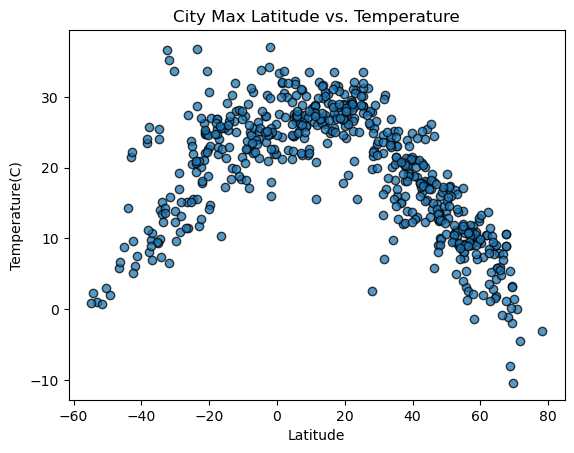

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o",edgecolors="black",alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

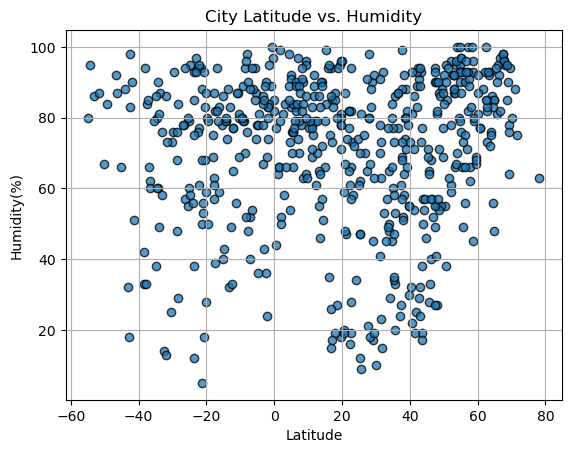

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o",edgecolors="black",alpha=0.75)
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

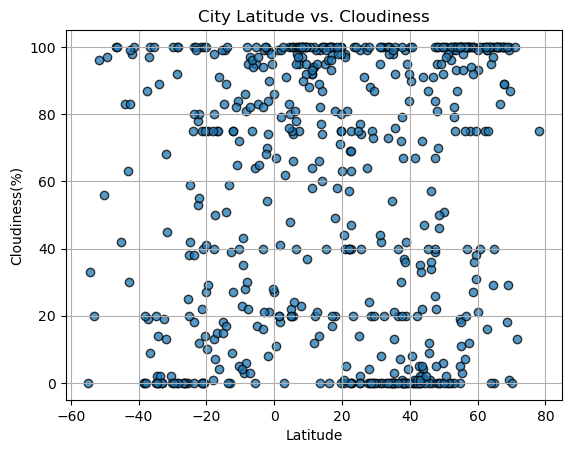

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o",edgecolors="black",alpha=0.75)
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

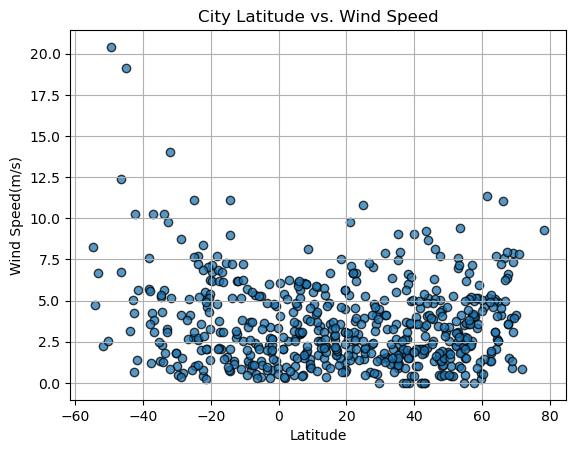

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def lin_reg_f(x,y,l):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r value is : {rvalue}')
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,l,fontsize=15,color="red", xytext =(-4, 4))
    plt.show()
#     plt.xlabel(f'{x}')
#     plt.ylabel(f'{y}')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,7.43,77,40,4.63,CA,1696218697
2,utrik,11.2278,169.8474,28.67,78,92,5.84,MH,1696218697
3,sarikei,2.1167,111.5167,30.61,52,79,0.99,MY,1696218697
4,boa vista,2.8197,-60.6733,29.99,58,0,2.57,BR,1696218698
5,smirnykh,49.7500,142.8333,13.83,77,92,1.79,RU,1696218698


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,5.86,92,100,12.38,NZ,1696218697
9,waitangi,-43.9535,-176.5597,14.34,88,83,3.13,NZ,1696218698
10,port-aux-francais,-49.3500,70.2167,1.95,84,97,20.41,TF,1696218699
13,cannonvale,-20.2833,148.7000,22.66,68,14,6.23,AU,1696218699
14,edinburgh of the seven seas,-37.0676,-12.3116,9.75,66,97,10.29,SH,1696218699


###  Temperature vs. Latitude Linear Regression Plot

The r value is : -0.8672758814092673


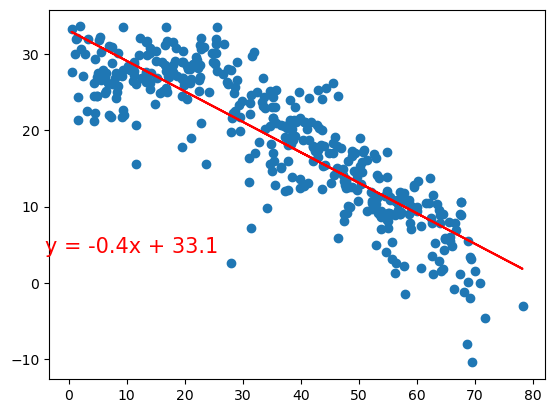

In [16]:
# Linear regression on Northern Hemisphere

lin_reg_f(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], (2,3))

The r value is : 0.6689643710736958


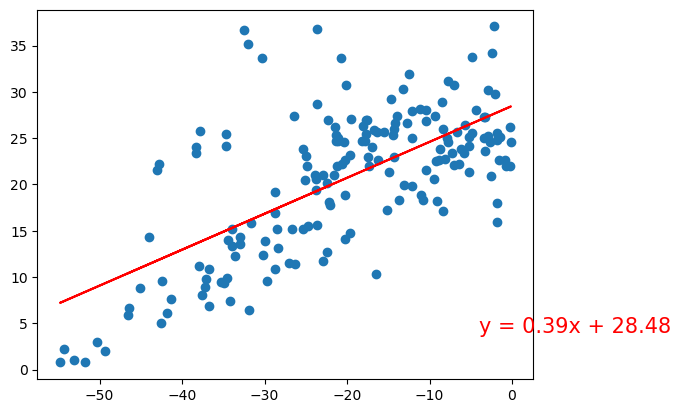

In [17]:
# Linear regression on Southern Hemisphere
lin_reg_f(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], (-20,10))

**Discussion about the linear relationship:** The relationship between latitude and temperature as observed from above two graphs: Temperatures are typically warmer approaching the Equator and cooler approaching the Poles.

### Humidity vs. Latitude Linear Regression Plot

The r value is : 0.1343666866010605


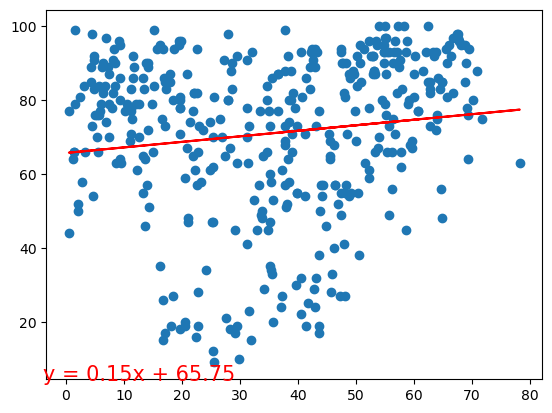

In [18]:
# Northern Hemisphere
lin_reg_f(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], (10,80))

The r value is : 0.10499619093328699


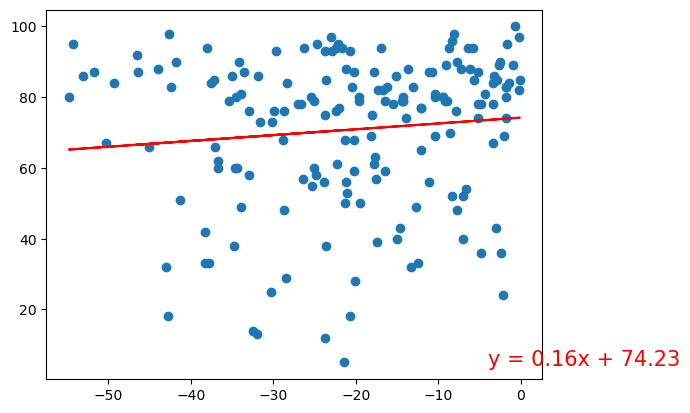

In [19]:
# Southern Hemisphere
lin_reg_f(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], (-50,40))

**Discussion about the linear relationship:** Since the r-value is very small and as observed in the graphs there is no strong coorelation between Humidity and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r value is : -0.004818911399499657


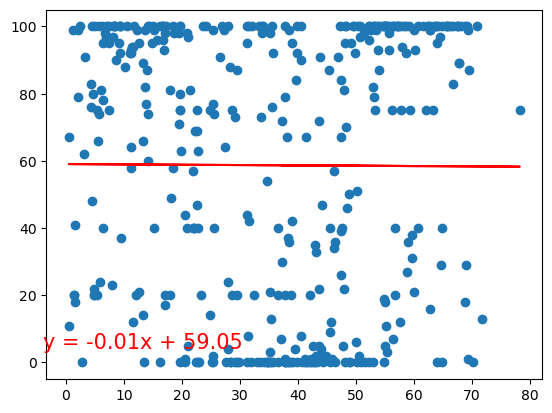

In [20]:
# Northern Hemisphere
lin_reg_f(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], (10,20))

The r value is : 0.14473304260325734


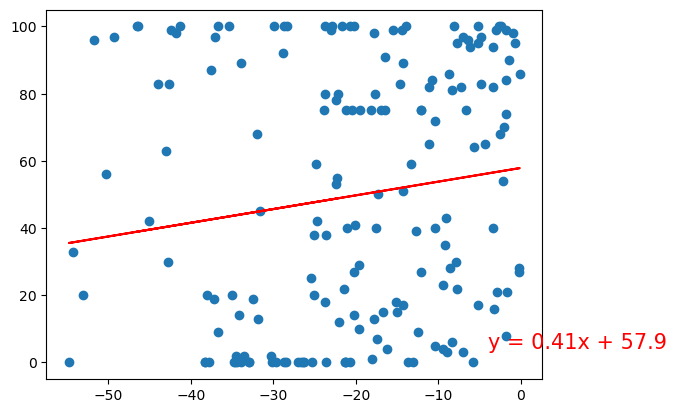

In [21]:
# Southern Hemisphere
lin_reg_f(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], (-40, 60))

**Discussion about the linear relationship:** Since the r-value is very small and as observed in the graphs there is no strong coorelation between Cloudiness and Latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r value is : 0.10302634982330758


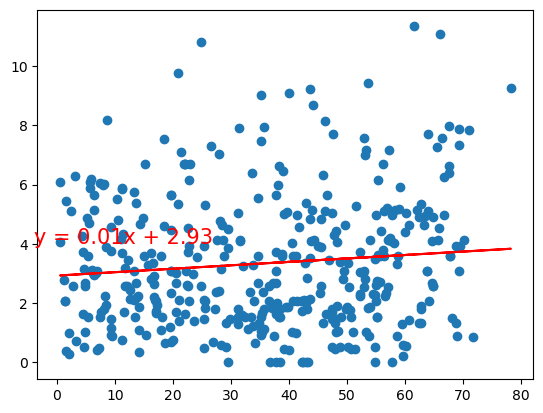

In [22]:
# Northern Hemisphere
lin_reg_f(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], (10,10))

The r value is : -0.3507215002528069


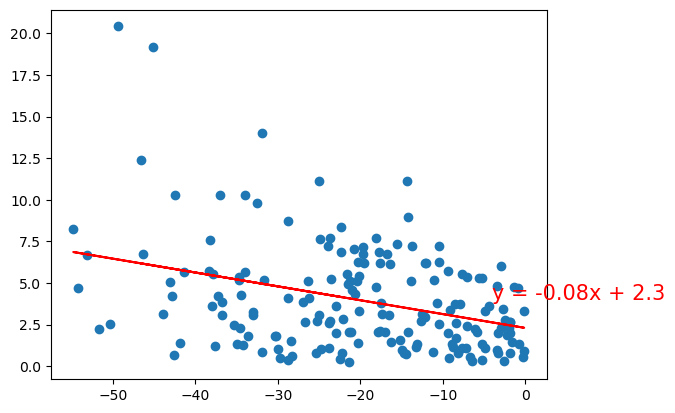

In [36]:
# Southern Hemisphere
lin_reg_f(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],(0,20))

**Discussion about the linear relationship:** Since the r-value is very small and as observed in the graphs there is no strong coorelation between Wind Speed and Latitude